In [31]:
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model 
my_model = load_model('keras_cifar10_trained_model.h5')

import numpy as np 
import matplotlib.pyplot as plt 
import pickle 

In [6]:
def unpickle(file): 
    with open(file, 'rb') as fo: 
        data = pickle.load(fo, encoding = 'bytes')
    return data 

In [7]:
def load_cifar_10_data(data_dir): 
    x_train = []
    y_train = [] 
    
    for i in range (1, 6): 
        batch_path = os.path.join(data_dir, "data_batch_{}".format(i))
        train_dict = unpickle(batch_path)
        if i == 1: 
            x_train = train_dict[b'data']
        else: 
            x_train = np.vstack((x_train, train_dict[b'data']))
        y_train += train_dict[b'labels']
    x_train = x_train.reshape((len(x_train), 3, 32, 32))
    x_train = x_train.transpose([0, 2, 3, 1])
    y_train = np.array(y_train)
    
    batch_path = os.path.join(data_dir, "test_batch")
    test_dict = unpickle(batch_path)
    x_test = test_dict[b'data']
    y_test = test_dict[b'labels']
    
    x_test = x_test.reshape((len(x_test), 3, 32, 32))
    x_test = x_test.transpose([0, 2, 3, 1])
    y_test = np.array(y_test)
    
    
    return x_train, y_train, x_test, y_test

In [10]:
data_path = os.path.join(os.getcwd(), 'cifar-10-batches-py')
x_train, y_train, x_test, y_test = load_cifar_10_data(data_path)

In [11]:
print('x_train shape: {}; y_train shape: {}'.format(x_train.shape, y_train.shape))
print('x_test shape: {}; y_test shape: {}'.format(x_test.shape, y_test.shape))

x_train shape: (50000, 32, 32, 3); y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3); y_test shape: (10000,)


In [38]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

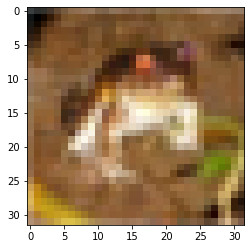

6 frog


In [39]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0], cifar10_classes[y_train[0]])

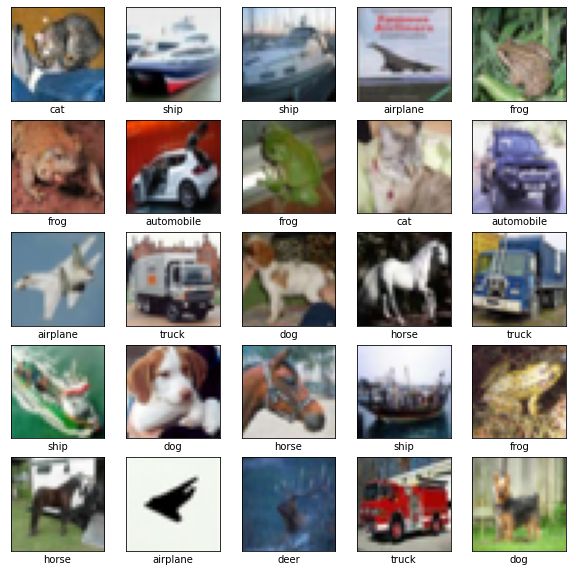

In [84]:
plt.figure(figsize = (10, 10))
for i in range(25): 
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(cifar10_classes[y_test[i]])
plt.show()

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [23]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

In [24]:
model.fit(x_train_normalized, y_train, validation_data = (x_test_normalized, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6287 - accuracy: 0.4055 - val_loss: 1.2289 - val_accuracy: 0.5695
Epoch 2/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.2976 - accuracy: 0.5325 - val_loss: 1.0940 - val_accuracy: 0.6170
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.1619 - accuracy: 0.5849 - val_loss: 1.0442 - val_accuracy: 0.6340
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0703 - accuracy: 0.6195 - val_loss: 0.9640 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.9989 - accuracy: 0.6447 - val_loss: 0.9110 - val_accuracy: 0.6782
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9414 - accuracy: 0.6669 - val_loss: 0.8950 - val_accuracy: 0.6894
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8911 - accuracy: 0.6802 - val_loss: 0.

In [25]:
test_loss, test_acc = model.evaluate(x_test_normalized, y_test, verbose = 2)
print('Test loss, test accuracy: {}, {}'.format(test_loss, test_acc))


313/313 - 5s - loss: 0.8809 - accuracy: 0.7020
Test loss, test accuracy: 0.880943238735199, 0.7020000219345093


In [26]:
# deeper model 
model2 = Sequential()

model2.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = x_train.shape[1:]))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)       

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
model.fit(x_train_normalized, y_train, validation_data = (x_test_normalized, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.7436 - accuracy: 0.7319 - val_loss: 0.8945 - val_accuracy: 0.6986
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7060 - accuracy: 0.7434 - val_loss: 0.9089 - val_accuracy: 0.6949
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6776 - accuracy: 0.7508 - val_loss: 0.8869 - val_accuracy: 0.7054
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.6547 - accuracy: 0.7639 - val_loss: 0.8858 - val_accuracy: 0.7044
Epoch 5/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.6391 - accuracy: 0.7658 - val_loss: 0.8999 - val_accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6218 - accuracy: 0.7742 - val_loss: 0.9078 - val_accuracy: 0.7065
Epoch 7/10
1563/1563 [==============================] - 109s 69ms/step - loss: 0.6045 - accuracy: 0.7777 - val_loss: 0.

In [30]:
model.save('keras_cifar10_trained_model.h5')

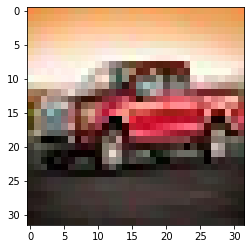

Class prediction: 2


In [61]:
image = plt.imread('truck.jpg')[:, :, 0:3]
plt.imshow(image)
plt.show()
predictions = my_model.predict_classes(np.asarray([image]))

cifar10_classes = np.asarray(cifar10_classes)
print('Class prediction: {}'.format(cifar10_classes[predictions]))

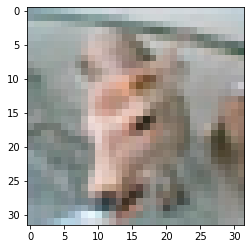

Class prediction: deer


In [87]:
k = 58
test_image = x_test[k]
plt.imshow(test_image)
plt.show()
print("Class prediction: {}".format(cifar10_classes[y_test[k]]))